In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
import datetime as dt
import pylab 
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo
import seaborn as sns

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'
yf.pdr_override()

In [2]:
end= dt.datetime.now()
start=dt.datetime(2020,1,15)

df=pdr.get_data_yahoo('TSLA',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-15,35.317333,35.855999,34.452667,34.566666,34.566666,260532000
2020-01-16,32.916668,34.297333,32.811333,34.232666,34.232666,326050500
2020-01-17,33.840668,34.377998,33.543999,34.033333,34.033333,204436500
2020-01-21,35.349998,36.571999,35.227333,36.480000,36.480000,267052500
2020-01-22,38.125999,39.633331,37.273335,37.970669,37.970669,470535000


In [3]:
simple_returns=df.Close.pct_change().dropna()
simple_returns

Date
2020-01-16   -0.009662
2020-01-17   -0.005823
2020-01-21    0.071890
2020-01-22    0.040863
2020-01-23    0.004635
                ...   
2023-04-05   -0.036660
2023-04-06   -0.002480
2023-04-10   -0.002972
2023-04-11    0.012357
2023-04-12   -0.033460
Name: Close, Length: 815, dtype: float64

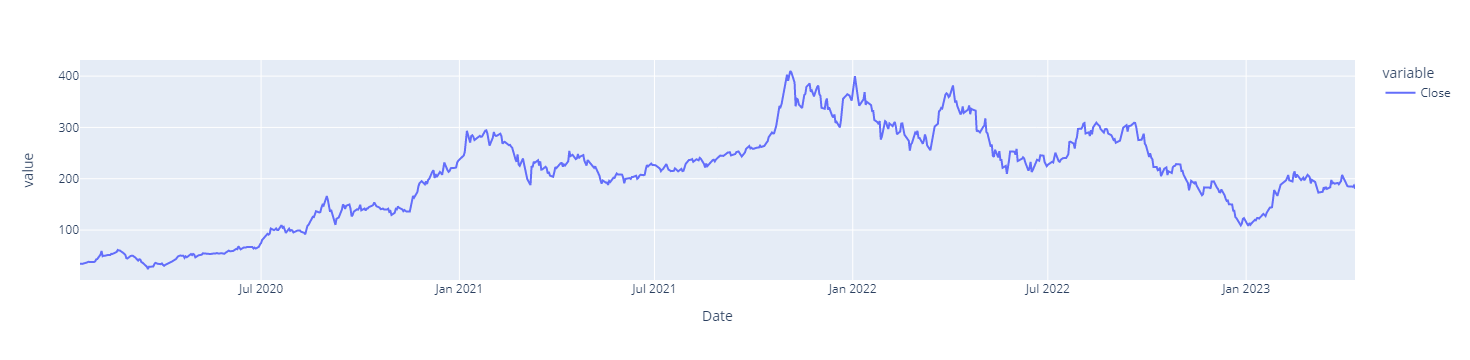

In [4]:
df.Close.plot().update_layout(autosize=False,width=500,height=300)
#print('First price',df.Close[0],'Last price',df.Close[-1])

In [5]:
simple_returns.mean()
#Does not work using mean simple return to get the last price
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

414.6410653773076

In [6]:
df.Close[0]*np.prod([(1+Rt) for Rt in simple_returns])
#last stock price

180.5399932861327

In [7]:
#using log return
#Close.shift(1) means the day before
log_returns=np.log(df.Close/df.Close.shift(1).dropna())
log_returns

Date
2020-01-15         NaN
2020-01-16   -0.009709
2020-01-17   -0.005840
2020-01-21    0.069424
2020-01-22    0.040050
                ...   
2023-04-05   -0.037349
2023-04-06   -0.002483
2023-04-10   -0.002976
2023-04-11    0.012281
2023-04-12   -0.034033
Name: Close, Length: 816, dtype: float64

In [8]:
log_returns.mean()
df.Close[0]*np.exp(log_returns.mean()*len(log_returns))

180.90655373830026

In [9]:
# SIMPLE RETURNS: The product of normally distribution variables is NOT normally distributed
# LOG RETURNS: The sum of normally distributed variables follows a normal distribution
# Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality

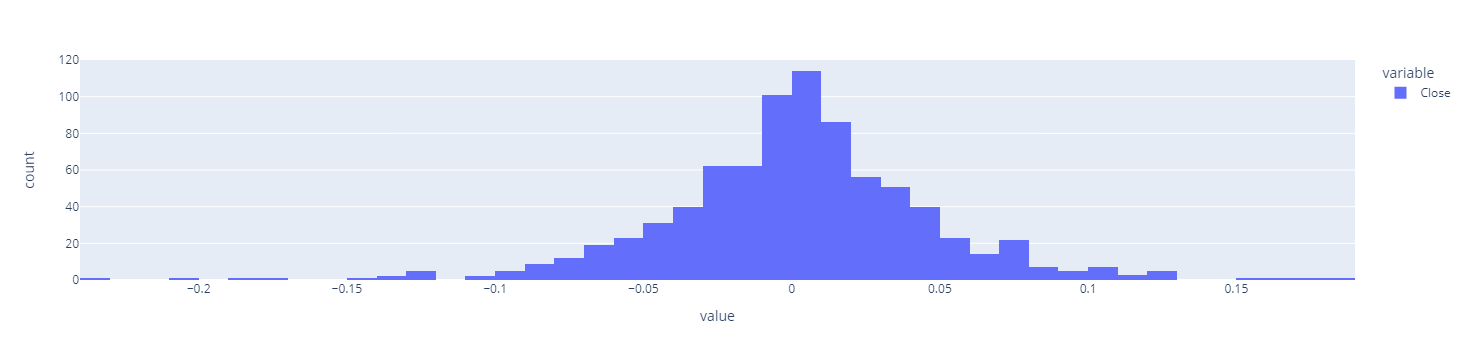

In [10]:
#Histogram
log_returns.plot(kind='hist').update_layout(autosize=False,width=500,height=300)

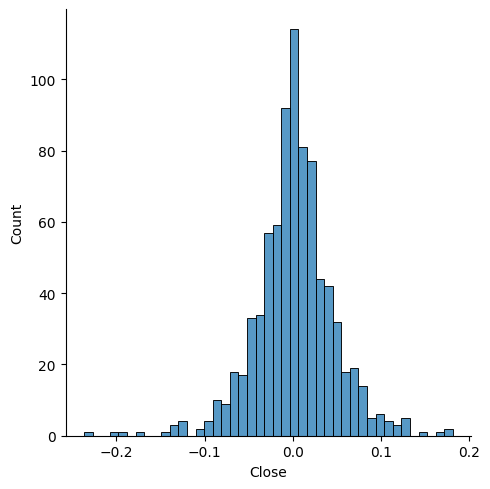

In [11]:
sns.displot(log_returns)

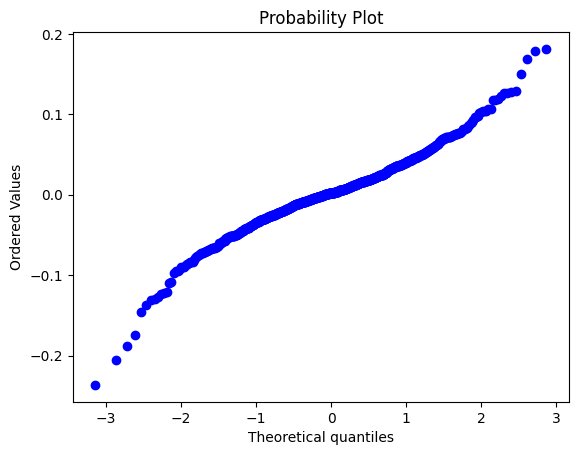

In [12]:
#Quantile quantile plot Q-Q plot
stats.probplot(log_returns,dist='norm',plot=pylab)
#print()
pylab.show()

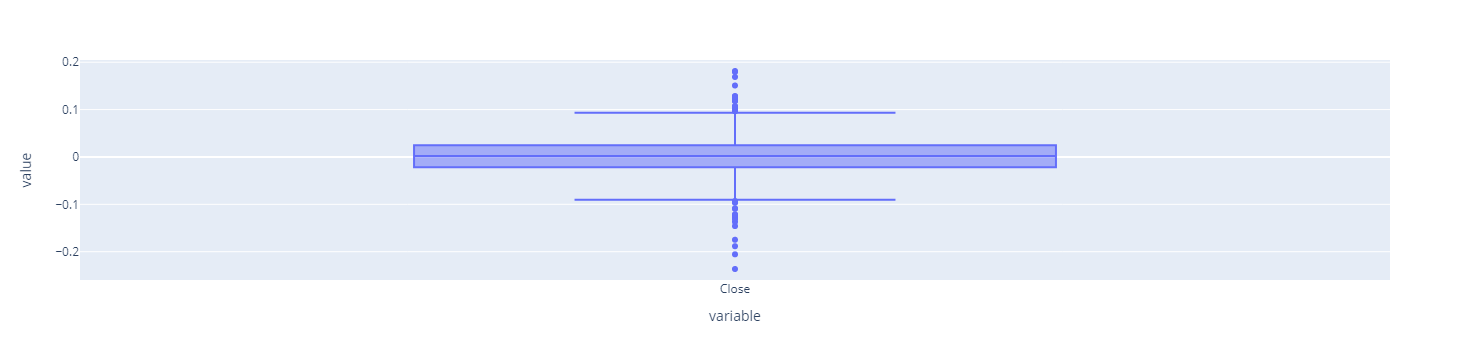

In [13]:
#Box using plotly
log_returns.plot(kind='box').update_layout(autosize=False,width=500,height=300)

<Axes: xlabel='Close'>

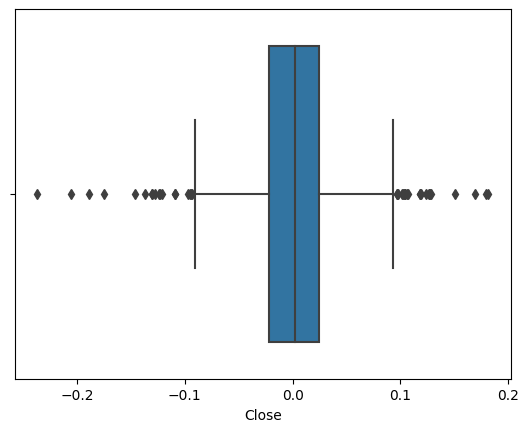

In [14]:
#box using seaborn
sns.boxplot(x=log_returns)

In [24]:
#Shapiro-Wilk Test
from scipy.stats import shapiro
sw_stat,p= shapiro(log_returns)
print ('log_returns=%.20f,p=%.3f\n'%(sw_stat,p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

log_returns=nan,p=1.000

Probably Gaussian


In [23]:
#jarque-Bera test
from scipy.stats import jarque_bera
jb_stat,p1= jarque_bera(log_returns)
print ('log_returns=%.20f,p=%.20f\n'%(jb_stat,p1))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

log_returns=nan,p=nan

Probably Gaussian


In [17]:
#Kolmogorov-Smirnov test
from scipy.stats import kstest
ks_stat,p2= kstest(log_returns,'norm',args=(log_returns.mean(),log_returns.std()))
print ('log_returns=%.3f,p=%.3f\n'%(ks_stat,p2))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

log_returns=nan,p=nan

Probably Gaussian
